In [8]:
pwd

'/Volumes/Krupa/MISStudy/Spring 2019/Search/Final Project/IR_FinalProject'

In [9]:
cd /Volumes/Krupa/MISStudy/Spring 2019/Search/Final Project/IR_FinalProject/

/Volumes/Krupa/MISStudy/Spring 2019/Search/Final Project/IR_FinalProject


In [10]:
ls

Task2/               json-simple-1.1.jar* src/
bin/                 output/


In [152]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import metrics
df = pd.read_csv("/Volumes/Krupa/MISStudy/Spring 2019/Search/Final Project/IR_FinalProject/output/business_cat.csv")

In [153]:
df.head()

,business_ID,categories
0,6nKR80xEGHYf2UxAeCug,Farmers Market Gas Stations Automotive Car ...
1,Ja4stXdNYr39u5CZHMNtjw,Venues & Event Spaces Cocktail Bars Nightlif...
2,SoLPRdhlyL5HAknBKTUcQ,Seafood Sushi Bars Restaurants Japanese
3,yNPh5SO7wr8HPpVCDPbXQ,American (New) American (Traditional) Bars ...
4,1qwkbN3wu3AGDxMTXVz2gA,Event Planning & Services Party & Event Plann...


In [154]:
df1 = pd.read_csv("/Volumes/Krupa/MISStudy/Spring 2019/Search/Final Project/IR_FinalProject/output/dataStopWordRemoved.csv")

In [155]:
busi_cat_id = df["business_ID"]
busi_cat_data = df1["business_ID"]
busi_cat_data[0]

'cHdJXLlKNWixBXpDwEGbA'

In [156]:
merged_busi_cat = pd.merge(df, df1, on=['business_ID'], how='inner')

In [157]:
 merged_busi_cat.shape

(136904, 5)

In [158]:
merged_busi_cat.columns

Index(['business_ID', 'categories', 'Unnamed: 0', 'stars', 'text'], dtype='object')

In [159]:
merged_busi_cat.head()

,business_ID,categories,Unnamed: 0,stars,text
0,6nKR80xEGHYf2UxAeCug,Farmers Market Gas Stations Automotive Car ...,10,5.0,best barbecue mississippi!!!! come car washed ...
1,6nKR80xEGHYf2UxAeCug,Farmers Market Gas Stations Automotive Car ...,23,3.0,food good price paid good gas station corn c...
2,6nKR80xEGHYf2UxAeCug,Farmers Market Gas Stations Automotive Car ...,34,5.0,really excited try bbq seeing highlighted ddd ...
3,6nKR80xEGHYf2UxAeCug,Farmers Market Gas Stations Automotive Car ...,47,5.0,tried brisket tacos ribs grits mexicorn p...
4,6nKR80xEGHYf2UxAeCug,Farmers Market Gas Stations Automotive Car ...,55,2.0,hyped national food channel visit uncomfortab...


In [161]:
#define X and y
X = merged_busi_cat.text
y = merged_busi_cat.categories

In [162]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [163]:
# examine the object shapes
print(X_train.shape)
print(X_test.shape)

(102678,)
(34226,)


In [164]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()

In [165]:
# fit and transform X_train
X_train_dtm = vect.fit_transform(X_train)

In [166]:
# only transform X_test
X_test_dtm = vect.transform(X_test)

In [167]:
# examine the shapes
print(X_train_dtm.shape)
print(X_test_dtm.shape)

(102678, 56630)
(34226, 56630)


In [168]:
# print the number of features that were generated
print('Features: ', X_train_dtm.shape[1])


Features:  56630


In [169]:
# use Multinomial Naive Bayes to predict the category
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

In [170]:
# print the accuracy of its predictions
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))

Accuracy:  0.350347688891486


In [171]:
print("Precision:" , metrics.precision_score(y_test, y_pred_class, average='weighted'))
print("Recall: ", metrics.recall_score(y_test,y_pred_class, average='weighted'))
print("F1-Score:", metrics.f1_score(y_test,y_pred_class, average='weighted'))

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Precision: 0.7578064061848269
Recall:  0.350347688891486
F1-Score: 0.333250287280643


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [172]:
# print the confusion matrix
print('Confusion Matrix: ')
print(metrics.confusion_matrix(y_test, y_pred_class))

Confusion Matrix: 
[[321   0   0 ...   0   0   0]
 [ 14  12   0 ...   0   0   0]
 [  5   0   3 ...   0   0   0]
 ...
 [ 12   0   0 ...  40   0   0]
 [  1   0   0 ...   0   8   0]
 [  0   0   0 ...   0   0  85]]


In [173]:
###NULL Accuracy : No of correct classifications when we predict all record to be star rating 5####
y_test.value_counts()/y_test.shape

Caterers  Event Planning & Services  Restaurants  American (New)  Barbeque                                                                                                                         0.018027
Sandwiches  Food  Burgers  Restaurants  American (New)  Specialty Food  Breakfast & Brunch  Breweries  Pizza  Nightlife  Bars  Pubs  Cheese Shops                                                  0.016742
Sandwiches  Restaurants  Pizza  Salad  Tapas/Small Plates  Italian                                                                                                                                 0.016157
Bakeries  American (New)  Nightlife  Bars  Coffee & Tea  Restaurants  Breakfast & Brunch  Food                                                                                                     0.016011
Nightlife  Sandwiches  Bars  American (New)  Cafes  Burgers  Restaurants                                                                                                                

In [174]:
svm = LinearSVC()
svm.fit(X_train_dtm.todense(), y_train)
y_pred_class = svm.predict(X_test_dtm)

In [175]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))

Accuracy:  0.6708934727984573


In [176]:
print('F1 Score:', metrics.f1_score(y_test, y_pred_class,average='weighted'))

F1 Score: 0.6670468911422359


In [177]:
print('Precision Score:', metrics.precision_score(y_test, y_pred_class,average="weighted"))

Precision Score: 0.6684324242005428


In [178]:
print('Recall Score:', metrics.recall_score(y_test,y_pred_class,average="weighted"))

Recall Score: 0.6708934727984573


In [37]:
import pandas as pd

In [38]:
cd /Volumes/Krupa/MISStudy/Spring 2019/Search/Final Project/

/Volumes/Krupa/MISStudy/Spring 2019/Search/Final Project


In [39]:
bm25_df = pd.read_csv("/Volumes/Krupa/MISStudy/Spring 2019/Search/Final Project/IR_FinalProject/output/QueryResults/BM25QueryResults.csv")

In [40]:
classic_df = pd.read_csv("/Volumes/Krupa/MISStudy/Spring 2019/Search/Final Project/IR_FinalProject/output/QueryResults/ClassicQueryResults.csv")

In [41]:
lmd_df = pd.read_csv("/Volumes/Krupa/MISStudy/Spring 2019/Search/Final Project/IR_FinalProject/output/QueryResults/LMDQueryResults.csv")

In [42]:
lmjm_df = pd.read_csv("/Volumes/Krupa/MISStudy/Spring 2019/Search/Final Project/IR_FinalProject/output/QueryResults/LMJMQueryResults.csv")

In [179]:
bm25_df.columns = ["business_ID", "Category-1", "Value-1","Category-2", "Value-2","Category-3", "Value-3"]

In [180]:
bm25_df.head()

,business_ID,Category-1,Value-1,Category-2,Value-2,Category-3,Value-3
0,a2ZBDIXmwBm7IWnXR6LKg,Caterers,3.037275,Mediterranean,2.234906,Event Planning & Services,0.604209
1,MVHGmZEwtKrXH11ySGweEw,Mediterranean,1.168756,Seafood,0.978283,Chinese,0.793769
2,HCCgrVnHQ2FI6lHsLvUQ,Mediterranean,1.668491,Asian Fusion,1.632188,Venues & Event Spaces,1.537549
3,qx6WhZ42eDKmBchZDax4dQ,Pizza,0.497394,Event Planning & Services,0.418670,Sandwiches,0.385398
4,eS29S06lvsDW04wVrIVxg,Arts & Entertainment,2.348780,Cafes,2.164929,Venues & Event Spaces,1.447308


In [45]:
classic_df.columns = ["business_ID", "Category-1", "Value-1","Category-2", "Value-2","Category-3", "Value-3"]

In [46]:
classic_df.head()

,business_ID,Category-1,Value-1,Category-2,Value-2,Category-3,Value-3
0,a2ZBDIXmwBm7IWnXR6LKg,Food,0.129198,Salad,0.036039,Mediterranean,0.035044
1,MVHGmZEwtKrXH11ySGweEw,Seafood,0.130388,Food,0.089296,Salad,0.034678
2,HCCgrVnHQ2FI6lHsLvUQ,Breakfast & Brunch,0.108772,Food,0.090199,Coffee & Tea,0.051837
3,qx6WhZ42eDKmBchZDax4dQ,Pizza,0.181003,Food,0.093869,American (New),0.050123
4,eS29S06lvsDW04wVrIVxg,Food,0.095181,Mexican,0.081468,Salad,0.028093


In [47]:
lmd_df.columns = ["business_ID", "Category-1", "Value-1","Category-2", "Value-2","Category-3", "Value-3"]

In [48]:
lmd_df.head()

,business_ID,Category-1,Value-1,Category-2,Value-2,Category-3,Value-3
0,a2ZBDIXmwBm7IWnXR6LKg,Caterers,2.793126,Mediterranean,1.835154,Restaurants,0.595281
1,MVHGmZEwtKrXH11ySGweEw,Seafood,3.338644,Home Services,0.040152,Gas Stations,0.000000
2,HCCgrVnHQ2FI6lHsLvUQ,Breakfast & Brunch,2.722535,Coffee & Tea,1.162840,Venues & Event Spaces,1.035277
3,qx6WhZ42eDKmBchZDax4dQ,Pizza,2.461787,American (New),1.414302,Home Services,0.780895
4,eS29S06lvsDW04wVrIVxg,Mexican,2.173264,Cafes,1.454534,Arts & Entertainment,1.042000


In [49]:
lmjm_df.columns = ["business_ID", "Category-1", "Value-1","Category-2", "Value-2","Category-3", "Value-3"]

In [50]:
lmjm_df.head()

,business_ID,Category-1,Value-1,Category-2,Value-2,Category-3,Value-3
0,a2ZBDIXmwBm7IWnXR6LKg,Caterers,2.104129,Mediterranean,1.322914,Event Planning & Services,0.875134
1,MVHGmZEwtKrXH11ySGweEw,Seafood,2.597716,Home Services,0.522971,Event Planning & Services,0.369631
2,HCCgrVnHQ2FI6lHsLvUQ,Breakfast & Brunch,2.002455,Coffee & Tea,1.155737,Venues & Event Spaces,0.916491
3,qx6WhZ42eDKmBchZDax4dQ,Pizza,1.818986,American (New),1.091271,Home Services,0.822171
4,eS29S06lvsDW04wVrIVxg,Mexican,1.569783,Arts & Entertainment,1.104243,Cafes,1.048064


Text(0.5,1,'ClassicQueryResults')

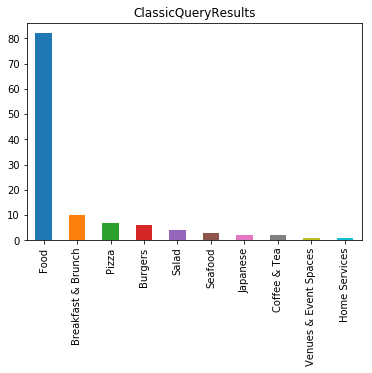

In [52]:
classic_df['Category-1'].value_counts().plot(kind='bar').set_title("ClassicQueryResults")

Text(0.5,1,'BM25QueryResults')

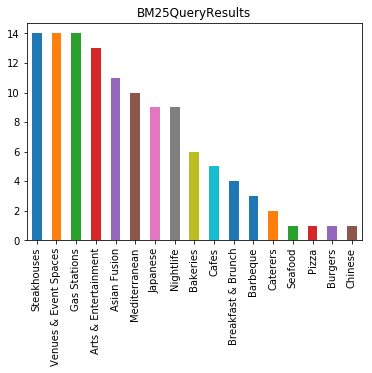

In [53]:
bm25_df['Category-1'].value_counts().plot(kind='bar').set_title("BM25QueryResults")

Text(0.5,1,'LMJMQueryResults')

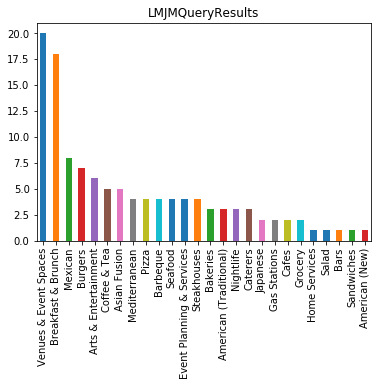

In [54]:
lmjm_df['Category-1'].value_counts().plot(kind='bar').set_title("LMJMQueryResults")

Text(0.5,1,'LMDQueryResults')

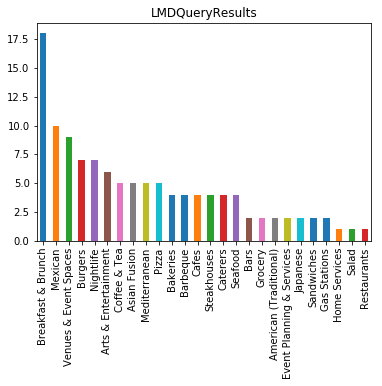

In [55]:
lmd_df['Category-1'].value_counts().plot(kind='bar').set_title("LMDQueryResults")

In [56]:
tfidf_df = pd.read_csv('/Volumes/Krupa/MISStudy/Spring 2019/Search/Final Project/IR_FinalProject/output/index/TFIDF.csv')

In [57]:
tfidf_df.columns = ["business_ID", "Category-1", "Value-1","Category-2", "Value-2","Category-3", "Value-3"]

Text(0.5,1,'TFIDFQueryResults')

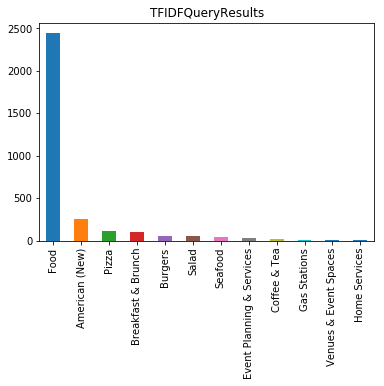

In [58]:
tfidf_df['Category-1'].value_counts().plot(kind='bar').set_title("TFIDFQueryResults")

In [59]:
tfidf_df.head()

,business_ID,Category-1,Value-1,Category-2,Value-2,Category-3,Value-3
0,a2ZBDIXmwBm7IWnXR6LKg,American (New),15.051499,Venues & Event Spaces,1.806180,Seafood,0.301030
1,MVHGmZEwtKrXH11ySGweEw,Seafood,161.954130,American (New),17.760769,Venues & Event Spaces,0.903090
2,HCCgrVnHQ2FI6lHsLvUQ,American (New),18.964890,Venues & Event Spaces,1.857333,Seafood,1.204120
3,qx6WhZ42eDKmBchZDax4dQ,American (New),89.706940,Venues & Event Spaces,1.806180,NaN,NaN
4,eS29S06lvsDW04wVrIVxg,American (New),29.199910,Seafood,15.954590,Venues & Event Spaces,2.584331
